# Data Exploration
<br/>
In this notebook you will find work on data preprocessing and amalgamation of mental health data different sources.
<br/>
Ensure required data is available in the [data/mental_health] directory.



## Setup

In [73]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.gridspec as grid
import numpy as np
import os
import pandas

DATA_DIR = 'data'
MENTAL_HEALTH_DIR = os.path.join(DATA_DIR, 'mental_health')

In [10]:
def load_data_frame(file_name, path):
    """
    Loads data from specified path and name, returns a dataframe 
    """

    file_path = os.path.join(path, file_name)
    return pandas.read_csv(file_path)


mental_df = load_data_frame(
    'prevalence-by-mental-and-substance-use-disorder.csv',
    MENTAL_HEALTH_DIR
)
mental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 10 columns):
Entity                       6156 non-null object
Code                         5292 non-null object
Year                         6156 non-null int64
Schizophrenia (%)            6156 non-null float64
Bipolar disorder (%)         6156 non-null float64
Eating disorders (%)         6156 non-null float64
Anxiety disorders (%)        6156 non-null float64
Drug use disorders (%)       6156 non-null float64
Depression (%)               6156 non-null float64
Alcohol use disorders (%)    6156 non-null float64
dtypes: float64(7), int64(1), object(2)
memory usage: 481.0+ KB


In [66]:
mental_df.columns.tolist()

['Entity',
 'Code',
 'Year',
 'Schizophrenia (%)',
 'Bipolar disorder (%)',
 'Eating disorders (%)',
 'Anxiety disorders (%)',
 'Drug use disorders (%)',
 'Depression (%)',
 'Alcohol use disorders (%)']

In [17]:
mental_df.head(10)

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990,0.158948,0.758814,0.085141,5.028167,0.930088,4.426541,0.600461
1,Afghanistan,AFG,1991,0.158422,0.758440,0.083073,5.026881,0.929888,4.422243,0.600217
2,Afghanistan,AFG,1992,0.157917,0.758228,0.081406,5.025292,0.929117,4.425022,0.600167
3,Afghanistan,AFG,1993,0.157403,0.757985,0.078833,5.023633,0.930892,4.425854,0.600052
4,Afghanistan,AFG,1994,0.156882,0.757793,0.076970,5.022831,0.932280,4.425465,0.599796
5,Afghanistan,AFG,1995,0.156354,0.757820,0.075841,5.023022,0.932839,4.428459,0.599401
6,Afghanistan,AFG,1996,0.155940,0.757639,0.075334,5.020851,0.933394,4.428658,0.599289
7,Afghanistan,AFG,1997,0.155538,0.757761,0.074083,5.020191,0.936968,4.429810,0.599145
8,Afghanistan,AFG,1998,0.155138,0.757913,0.073547,5.019951,0.940101,4.433638,0.598980
9,Afghanistan,AFG,1999,0.154736,0.758004,0.072615,5.019022,0.943303,4.432289,0.598860


In [53]:
non_country_entities = [
    'Andean Latin America', 'Central Asia', 'Central Europe',
    'Central Latin America', 'Central Sub-Saharan Africa',
    'East Asia', 'Eastern Europe', 'Eastern Sub-Saharan Africa',
    'High SDI', 'High-income Asia Pacific', 'High-middle SDI',
    'Latin America and Caribbean', 'Low SDI', 'Low-middle SDI',
    'Middle SDI', 'North Africa and Middle East', 'North America',
    'Oceania', 'South Asia', 'Southeast Asia', 'Southern Latin America',
    'Southern Sub-Saharan Africa', 'Sub-Saharan Africa', 'Tropical Latin America', 
    'Western Europe', 'Western Sub-Saharan Africa', 'World',
]

mental_df = mental_df[~mental_df['Entity'].isin(non_country_entities)]

### Disorder Rate by Country (per annum)

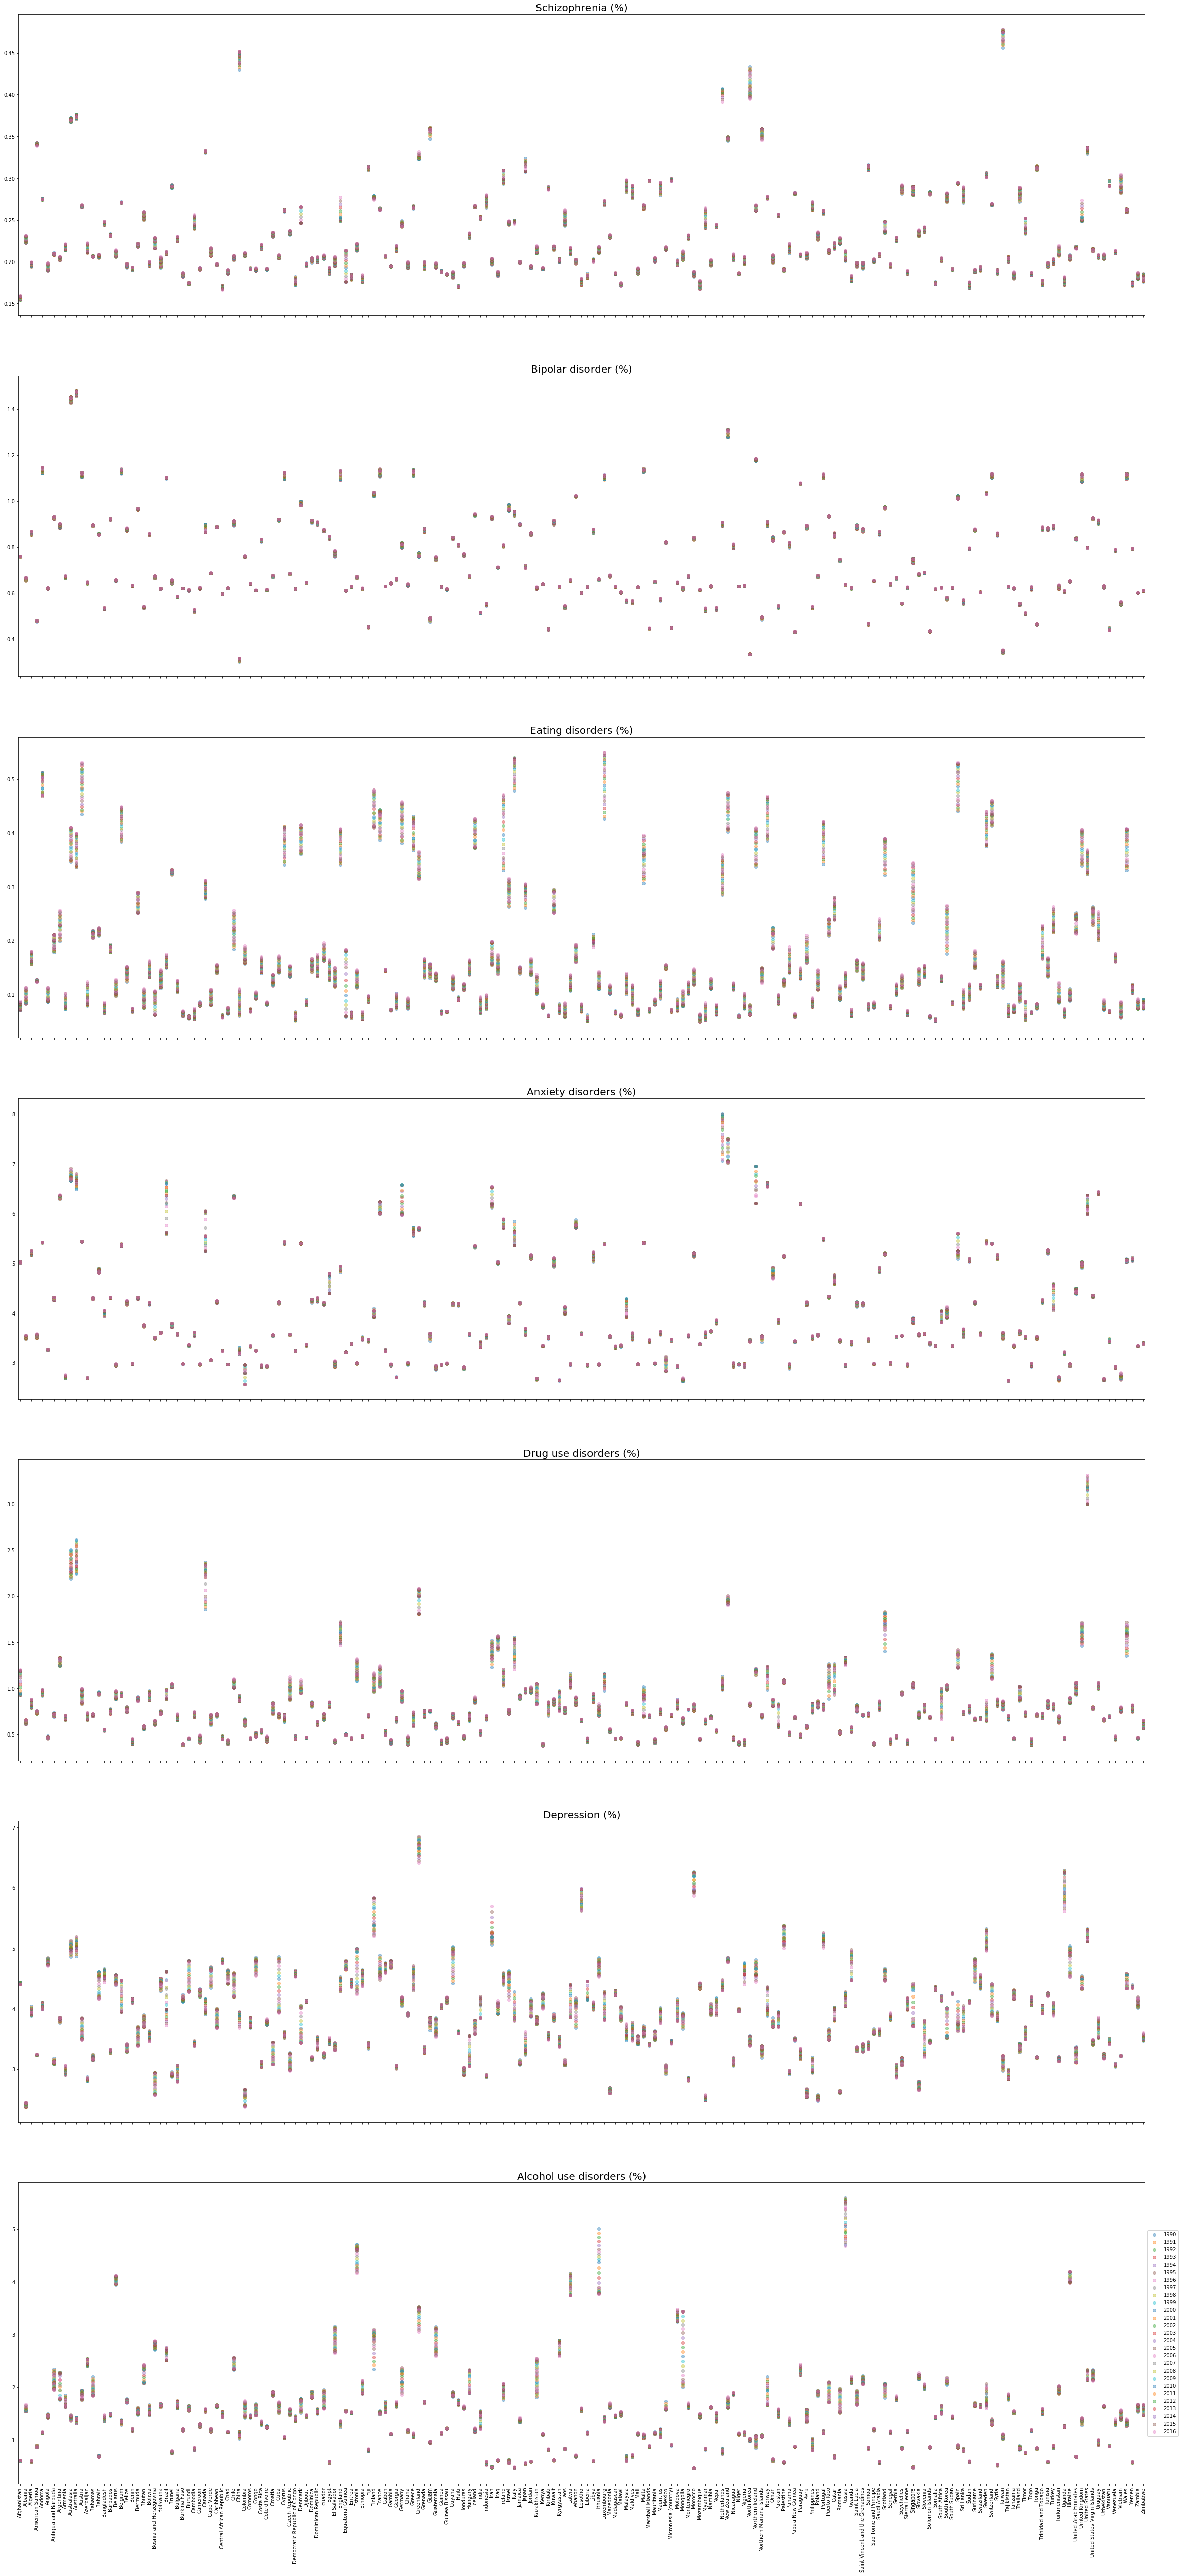

In [78]:
fig, axes = plt.subplots(nrows=7, sharex=True, figsize=(40,90))
gr = grid.GridSpec(7, 1)
gr.update(hspace=0.001)


alpha = 0.4
targets = mental_df.columns.tolist()

for year in mental_df['Year'].unique():
    x = mental_df.loc[mental_df['Year'] == year, 'Entity']

    for i, ax in enumerate(axes):
        y = mental_df.loc[mental_df['Year'] == year, targets[3+i]],
        ax.set_title(targets[3+i], fontsize=20)
        ax.scatter(
            x,
            y,
            alpha=alpha,
            label=year,
        )


plt.xticks(rotation=90)
plt.margins(x=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()